### Salary Prediction Software Developer: Data from Stack Overflow Annual Developer Survey 2021

#### Predicting a continues value using a regression in model machine learning. The salary will be based on real data points as:
- Country
- Profession (Job type)
- Education level
- Year of experience

### Import Libraries & Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


### Data Understanding: Manipulation and Analysis
- Visualizing the data distribution
- Removing outliers
- Cleaning the data

In [4]:
# only keeping the columns which might be relevant
df = df[['Country', 'Employment', 'EdLevel', 'YearsCodePro', 'DevType', 'ConvertedCompYearly']]
df = df.rename(columns={"YearsCodePro": "YearsExperience", "ConvertedCompYearly": "AnualSalary"})
df.head()

,Country,Employment,EdLevel,YearsExperience,DevType,AnualSalary
0,Slovakia,"Independent contractor, freelancer, or self-em...","Secondary school (e.g. American high school, G...",NaN,"Developer, mobile",62268.0
1,Netherlands,"Student, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN
2,Russian Federation,"Student, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,NaN
3,Austria,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, front-end",NaN
4,United Kingdom of Great Britain and Northern I...,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Developer, desktop or enterprise applications;...",NaN


In [5]:
df.shape

(83439, 6)

In [6]:
df.isnull().sum()

Country                0
Employment           116
EdLevel              313
YearsExperience    22223
DevType            16955
AnualSalary        36595
dtype: int64

In [7]:
#remove salaries which are NaN
mask = df['AnualSalary'].notnull()
df = df[mask]
df.head()

,Country,Employment,EdLevel,YearsExperience,DevType,AnualSalary
0,Slovakia,"Independent contractor, freelancer, or self-em...","Secondary school (e.g. American high school, G...",NaN,"Developer, mobile",62268.0
9,Sweden,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Data scientist or machine learning specialist,51552.0
11,Spain,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, back-end",46482.0
12,Germany,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, desktop or enterprise applications;...",77290.0
16,Turkey,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Developer, full-stack",17748.0


In [8]:
df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', 'I prefer not to say', 'Employed part-time',
       'Retired', nan], dtype=object)

In [9]:
# only keeping the users with Employed full-time for employment column
mask = df['Employment'] == 'Employed full-time'
df = df[mask]

#drop the columns employment
df.drop('Employment', axis=1, inplace=True)

In [10]:
df.isnull().sum()

Country              0
EdLevel             19
YearsExperience    399
DevType             29
AnualSalary          0
dtype: int64

#### Cleaning and Groupping the Years of Experience

In [11]:
# let's examine the column YearsExperience

df['YearsExperience'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '1', '12', '8', nan, '17', '14', '7', '26', '34', '11',
       '25', '24', '22', '13', '9', '20', '23', '39', '27', '35', '30',
       '19', '33', '28', '37', '43', '40', '29', '38', '31', '45', '42',
       '46', '32', '36', '47', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [12]:
# going row by row to convert as float and also changing Less than 1 year and More than 50 years

def clean_experience(row):
    if row == 'Less than 1 year':
        row = 0.5
    if row == 'More than 50 years':
        row = 50
    
    return float(row)

In [13]:
df['YearsExperience'] = df['YearsExperience'].apply(clean_experience)

In [14]:
df['YearsExperience'].mean()

8.790705478771006

In [15]:
# assuming the mean is roughly 9, so I will replace NaN for 9

df['YearsExperience'] = df['YearsExperience'].fillna(9)

In [16]:
df['YearsExperience'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
        1. , 12. ,  8. ,  9. , 17. , 14. ,  7. , 26. , 34. , 11. , 25. ,
       24. , 22. , 13. , 20. , 23. , 39. , 27. , 35. , 30. , 19. , 33. ,
       28. , 37. , 43. , 40. , 29. , 38. , 31. , 45. , 42. , 46. , 32. ,
       36. , 47. , 44. , 41. , 50. , 49. , 48. ])

In [17]:
df.describe()

,YearsExperience,AnualSalary
count,40627.000000,4.062700e+04
mean,8.792761,1.213697e+05
std,7.604091,4.982684e+05
min,0.500000,1.000000e+00
25%,3.000000,2.850000e+04
50%,6.000000,5.773200e+04
75%,12.000000,1.000000e+05
max,50.000000,3.046852e+07


In [18]:
# keeping only years which are below 97.5%  (0.975-quantile)

mask = df['YearsExperience'] <= df['YearsExperience'].quantile(0.975)
df = df[mask]

In [19]:
df['YearsExperience'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
        1. , 12. ,  8. ,  9. , 17. , 14. ,  7. , 26. , 11. , 25. , 24. ,
       22. , 13. , 20. , 23. , 27. , 30. , 19. , 28. , 29. ])

In [20]:
# Drop the columns which still contains missing values.
df.dropna(inplace=True)
df.isnull().sum()

Country            0
EdLevel            0
YearsExperience    0
DevType            0
AnualSalary        0
dtype: int64

In [21]:
df.head()

,Country,EdLevel,YearsExperience,DevType,AnualSalary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4.0,Data scientist or machine learning specialist,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,"Developer, back-end",46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,"Developer, desktop or enterprise applications;...",77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2.0,"Developer, full-stack",17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,"Developer, front-end;Developer, full-stack;Dev...",46135.0


#### Removing Countries and Job titles which appears with less frequency in the Dataframe

In [22]:
#Check the frequency / quantity of each country in the df

print(df['Country'].value_counts())
print(df['Country'].value_counts().index[0]) #get the first index
print(df['Country'].value_counts().values[0]) #get the first value

United States of America                                8811
India                                                   3461
Germany                                                 2738
United Kingdom of Great Britain and Northern Ireland    2527
Canada                                                  1524
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Somalia                                                    1
Libyan Arab Jamahiriya                                     1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64
United States of America
8811


In [23]:
# Define a function where group the countries which are less than the cutoff value set as Other.
# Eliminate those countries which has less to get a better performece in the model.

def cut_category(category, cutoff):
    category_map = {}
    
    for i in range(len(category)):
        if category.values[i] >= cutoff:
            category_map[category.index[i]] = category.index[i]
        
        else:
            category_map[category.index[i]] = 'Other'
            
    return category_map

In [24]:
# Set 400 is the minimun limit of data points for each country needed to train the model.
country_map = cut_category(df['Country'].value_counts(), 400)

In [25]:
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Other                                                   10755
United States of America                                 8811
India                                                    3461
Germany                                                  2738
United Kingdom of Great Britain and Northern Ireland     2527
Canada                                                   1524
France                                                   1394
Brazil                                                   1339
Spain                                                     887
Netherlands                                               824
Australia                                                 797
Poland                                                    777
Italy                                                     756
Russian Federation                                        743
Sweden                                                    734
Turkey                                                    471
Switzerl

In [26]:
# remove the other in Country
df = df[df['Country'] != 'Other']

#### Cleaning the Job Title

In [27]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                               4216
Developer, back-end                                                                                                                                                                                                 2779
Developer, front-end                                                                                                                                                                                                1073
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                                       979
Developer, full-stack;Developer, back-end                                                                                           

In [28]:
# For simplicity, resuming the developer type column to get the first part only.

def dev_postion(row):
    x = row.split(';')
    return x[0]

df['DevType'] = df['DevType'].apply(dev_postion)

In [29]:
# Note it has Other (please specify) with 761 repetitions.

df['DevType'].value_counts()

Developer, full-stack                            7923
Developer, front-end                             5813
Developer, back-end                              4033
Developer, mobile                                3365
Developer, desktop or enterprise applications    2603
Engineer, data                                   1081
Data scientist or machine learning specialist     938
Other (please specify):                           761
Developer, embedded applications or devices       434
Academic researcher                               392
DevOps specialist                                 357
Engineering manager                               253
Developer, QA or test                             227
Data or business analyst                          162
Senior Executive (C-Suite, VP, etc.)              106
Developer, game or graphics                       105
System administrator                               89
Database administrator                             88
Scientist                   

In [30]:
#calling the same function again
dev_map = cut_category(df['DevType'].value_counts(), 150)
df['DevType'] = df['DevType'].map(dev_map)
df['DevType'].value_counts()

Developer, full-stack                            7923
Developer, front-end                             5813
Developer, back-end                              4033
Developer, mobile                                3365
Developer, desktop or enterprise applications    2603
Engineer, data                                   1081
Data scientist or machine learning specialist     938
Other (please specify):                           761
Other                                             697
Developer, embedded applications or devices       434
Academic researcher                               392
DevOps specialist                                 357
Engineering manager                               253
Developer, QA or test                             227
Data or business analyst                          162
Name: DevType, dtype: int64

In [31]:
# Also, removing the other in DevType
df = df[df['DevType'] != 'Other (please specify):']
df = df[df['DevType'] != 'Other']

#### Examine the outliers for:
- each country
- each job type

In [32]:
df.describe()

,YearsExperience,AnualSalary
count,27581.000000,2.758100e+04
mean,8.604293,1.399983e+05
std,6.758613,5.076715e+05
min,0.500000,1.000000e+00
25%,3.000000,3.781600e+04
50%,7.000000,6.806800e+04
75%,12.000000,1.134470e+05
max,30.000000,2.000000e+07


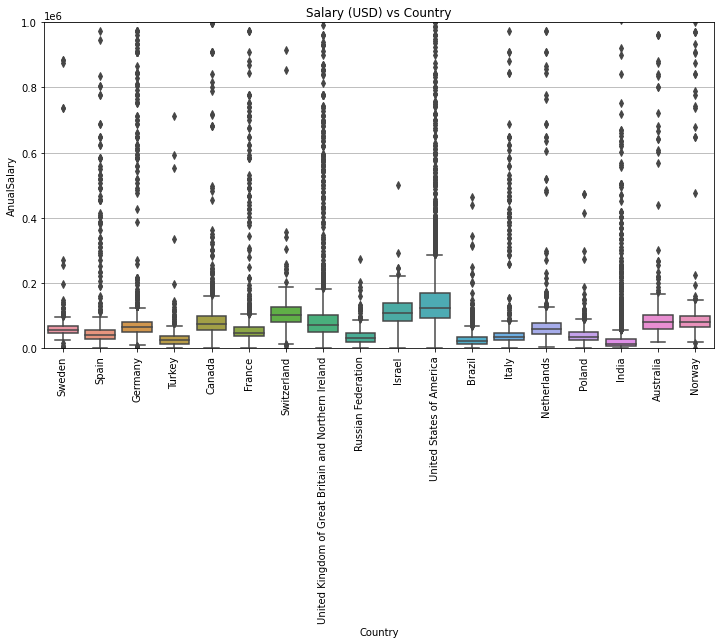

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x="Country", y="AnualSalary",  data=df)
ax.yaxis.grid(True)
plt.title('Salary (USD) vs Country')
plt.ylim(0, 1000000)
plt.xticks(rotation=90)

plt.show()

In [37]:
# Defining the min and max limit anual salary as quantile 0.025 and 0.90 for each country

def remove_outliers_country(df, new_df):
    countries = df['Country'].unique()
    
    for country in countries:
        new_df_country = df[df['Country'] == country]
        mask = (new_df_country['AnualSalary'] >= new_df_country['AnualSalary'].quantile(0.025)) & (new_df_country['AnualSalary'] <= new_df_country['AnualSalary'].quantile(0.90))
        new_df_country = new_df_country[mask]
        new_df = new_df.append(new_df_country, ignore_index = True)
    
    return new_df

In [38]:
new_df = pd.DataFrame(columns=['Country', 'EdLevel', 'YearsExperience', 'DevType', 'AnualSalary'])
df = remove_outliers_country(df, new_df)

In [40]:
df.shape

(24232, 5)

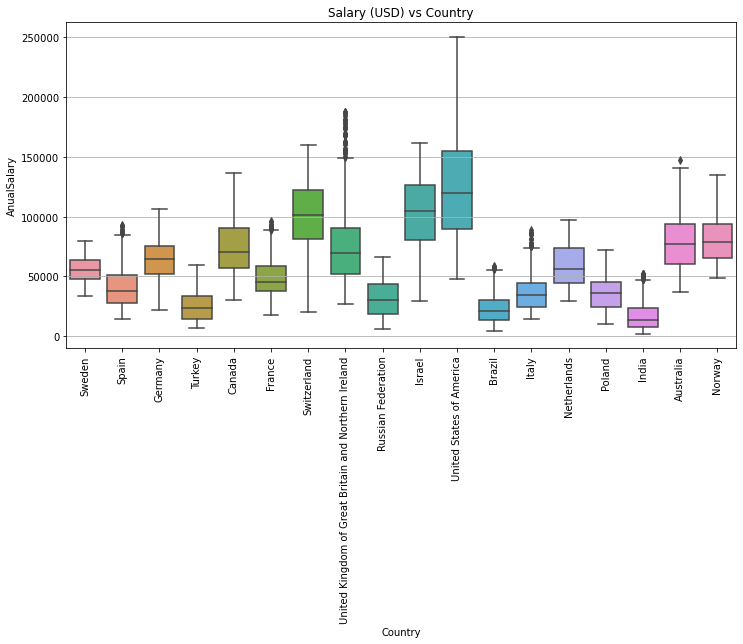

In [41]:
# Plotting the graph again

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x="Country", y="AnualSalary",  data=df)
ax.yaxis.grid(True)
plt.title('Salary (USD) vs Country')
plt.xticks(rotation=90)

plt.show()

#### Let's see the distribution of salary for each job

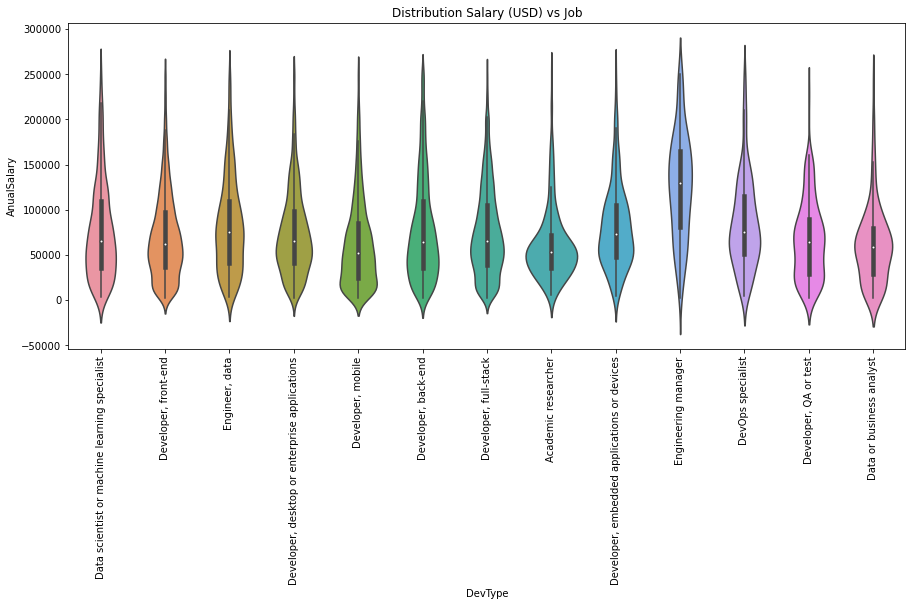

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.violinplot(x="DevType", y="AnualSalary",  data=df)
plt.title('Distribution Salary (USD) vs Job')
plt.xticks(rotation=90)

plt.show()

In [43]:
# removing the outliers with the same logic as above

def remove_outliers_job(df, new_df):
    jobs = df['DevType'].unique()
    
    for job in jobs:
        new_df_job = df[df['DevType'] == job]
        mask = (new_df_job['AnualSalary'] >= new_df_job['AnualSalary'].quantile(0.025)) & (new_df_job['AnualSalary'] <= new_df_job['AnualSalary'].quantile(0.90))
        new_df_job = new_df_job[mask]
        new_df = new_df.append(new_df_job, ignore_index = True)
    
    return new_df

In [44]:
new_df = pd.DataFrame(columns=['Country', 'EdLevel', 'YearsExperience', 'DevType', 'AnualSalary'])
df = remove_outliers_job(df, new_df)

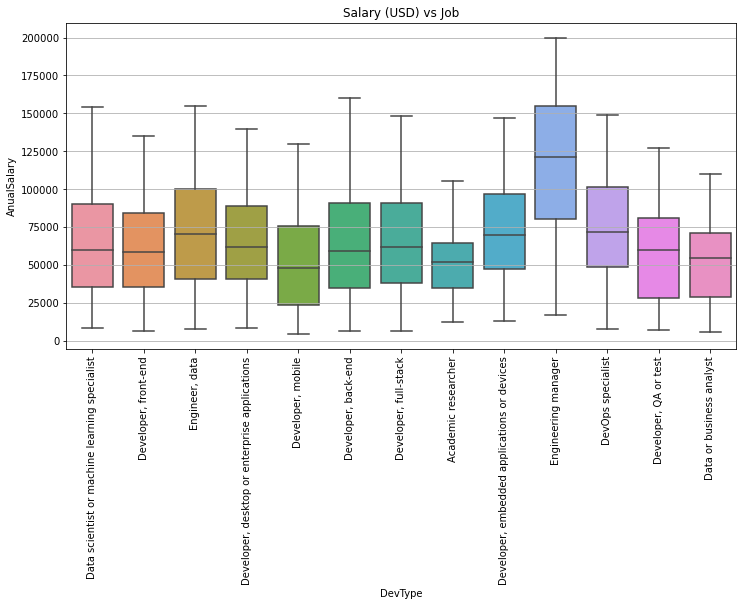

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x="DevType", y="AnualSalary",  data=df)
ax.yaxis.grid(True)
plt.title('Salary (USD) vs Job')
plt.xticks(rotation=90)

plt.show()

In [46]:
df.shape

(21267, 5)

#### Cleaning and Groupping the Education levels

In [47]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Primary/elementary school'], dtype=object)

In [48]:
def clean_education(row):
    if 'Bachelor’s degree' in row:
        return 'Bachelor’s degree'
    elif 'Master’s degree' in row:
        return 'Master’s degree'
    elif 'Other doctoral' in row or 'Professional degree' in row:
        return 'Postgraduate'
    else:
        return 'Less than a Bachelor’s'

In [49]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [50]:
df['EdLevel'].unique()

array(['Master’s degree', 'Postgraduate', 'Bachelor’s degree',
       'Less than a Bachelor’s'], dtype=object)

In [51]:
df.head()

,Country,EdLevel,YearsExperience,DevType,AnualSalary
0,Sweden,Master’s degree,4.0,Data scientist or machine learning specialist,51552.0
1,Sweden,Master’s degree,9.0,Data scientist or machine learning specialist,57684.0
2,Sweden,Master’s degree,4.0,Data scientist or machine learning specialist,38292.0
3,Sweden,Postgraduate,10.0,Data scientist or machine learning specialist,78552.0
4,Sweden,Master’s degree,2.0,Data scientist or machine learning specialist,35412.0


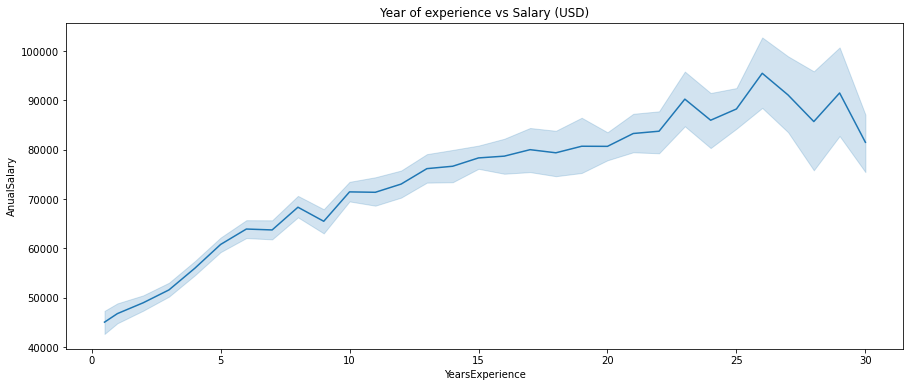

In [52]:
# let's examine the distribution of years vs salary.

fig, ax = plt.subplots(figsize=(15,6))

sns.lineplot(data=df, x="YearsExperience", y="AnualSalary")
plt.title('Year of experience vs Salary (USD)')

plt.show()

In [53]:
# saving it to use in the app later on
df.to_csv('data_cleaned.csv', index = False)

In [54]:
#loading the df
df = pd.read_csv('data_cleaned.csv')

### Data Preprocessing and Modeling: 
- Prepocessing columns using skitlearn libraries: Standard Scale and Encoding categorical columns to numerical
- Using GridSearch Cross Validation to choose hyperparameters for best model performace

In [55]:
df.head()

,Country,EdLevel,YearsExperience,DevType,AnualSalary
0,Sweden,Master’s degree,4.0,Data scientist or machine learning specialist,51552.0
1,Sweden,Master’s degree,9.0,Data scientist or machine learning specialist,57684.0
2,Sweden,Master’s degree,4.0,Data scientist or machine learning specialist,38292.0
3,Sweden,Postgraduate,10.0,Data scientist or machine learning specialist,78552.0
4,Sweden,Master’s degree,2.0,Data scientist or machine learning specialist,35412.0


In [56]:
df.shape

(21267, 5)

In [57]:
df.dtypes

Country             object
EdLevel             object
YearsExperience    float64
DevType             object
AnualSalary        float64
dtype: object

In [58]:
# separating the dependent and independent variables
X = df.drop('AnualSalary', axis=1)
y = df['AnualSalary']
print(X.shape, y.shape)

(21267, 4) (21267,)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17013, 4) (4254, 4) (17013,) (4254,)


In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

oe = OrdinalEncoder(categories = [['Less than a Bachelor’s', 'Bachelor’s degree', 'Master’s degree', 'Postgraduate']])
ohe = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()
ct = make_column_transformer((oe, ['EdLevel']), 
                             (ohe, ['Country', 'DevType']),
                             (numeric_transformer, ['YearsExperience']),
                             remainder='passthrough')

X_train_new = ct.fit_transform(X_train)

In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

# create one pipeline for each algorithm

pipelines = {
    'LS': make_pipeline(Lasso(max_iter=5000)),
    'EN': make_pipeline(ElasticNet()),
    'DT': make_pipeline(DecisionTreeRegressor()),
    'KNN' : make_pipeline(KNeighborsRegressor()),
    'RF' : make_pipeline(RandomForestRegressor()),
    'GB' : make_pipeline(GradientBoostingRegressor())
}

In [75]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [77]:
pipelines

{'LS': Pipeline(steps=[('lasso', Lasso(max_iter=5000))]),
 'EN': Pipeline(steps=[('elasticnet', ElasticNet())]),
 'DT': Pipeline(steps=[('decisiontreeregressor', DecisionTreeRegressor())]),
 'KNN': Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor())]),
 'RF': Pipeline(steps=[('randomforestregressor', RandomForestRegressor())]),
 'GB': Pipeline(steps=[('gradientboostingregressor', GradientBoostingRegressor())])}

In [78]:
hypergrid = {
    'LS' : { 
            'lasso__alpha' : [0.001, 0.01, 0.1, 0.5, 0.99]    
    },
    'EN' : { 
            'elasticnet__alpha' : [0.001, 0.01, 0.1, 0.5, 0.99]    
    },
    'DT': {
            'decisiontreeregressor__min_samples_leaf' : [1, 2, 3],
           'decisiontreeregressor__min_samples_split' : [2, 4, 6]
    },
    'KNN' : {
            'kneighborsregressor__n_neighbors' : [7, 9, 11],
            'kneighborsregressor__leaf_size' : [50, 60]
    },
    'RF' : {
            'randomforestregressor__min_samples_split' : [2, 4, 6],
            'randomforestregressor__min_samples_leaf' : [1, 2, 3]
    },
    'GB' : {
            'gradientboostingregressor__alpha' : [0.001, 0.01, 0.1, 0.5, 0.99],
            'gradientboostingregressor__max_depth' : [4, 5, 6],
            'gradientboostingregressor__min_samples_split' : [2, 4, 6],
            'gradientboostingregressor__min_samples_leaf' : [1, 2, 3]
    }
}

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

results_model = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=5, scoring='r2', n_jobs=-1)
    
    try:
        print(f'Starting training {algo} model.')
        model.fit(X_train_new, y_train)
        results_model[algo] = model
        print(f'The {algo} model has been successfuly fit.')
    except NotFittedError as e:
        print(repr(e))

Starting training LS model.
The LS model has been successfuly fit.
Starting training EN model.
The EN model has been successfuly fit.
Starting training DT model.
The DT model has been successfuly fit.
Starting training KNN model.
The KNN model has been successfuly fit.
Starting training RF model.
The RF model has been successfuly fit.
Starting training GB model.
The GB model has been successfuly fit.


In [80]:
for algo in results_model.keys():
    print(f'The score of the {algo} is:', results_model[algo].best_score_)

The score of the LS is: 0.7314517746829488
The score of the EN is: 0.7313708889149402
The score of the DT is: 0.7003203450173896
The score of the KNN is: 0.7271607707922534
The score of the RF is: 0.7320846234935733
The score of the GB is: 0.7520282946637566


In [81]:
#During the GridSearch CV using Cross Validation = 5, the model which perfomed well was GB.
#Let's take a look in it

result_gb = pd.DataFrame(results_model['GB'].cv_results_)
result_gb.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__alpha,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__min_samples_leaf,param_gradientboostingregressor__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,1.691619,0.013986,0.018746,0.006251,0.1,5,3,6,"{'gradientboostingregressor__alpha': 0.1, 'gra...",0.745675,0.749304,0.758590,0.745442,0.761130,0.752028,0.006589,1
124,1.715945,0.018580,0.021469,0.007190,0.99,5,3,4,"{'gradientboostingregressor__alpha': 0.99, 'gr...",0.745675,0.749304,0.758588,0.745442,0.761130,0.752028,0.006588,2
98,1.683978,0.011689,0.021870,0.007652,0.5,5,3,6,"{'gradientboostingregressor__alpha': 0.5, 'gra...",0.745671,0.749311,0.758590,0.745442,0.761125,0.752028,0.006588,3
44,1.680628,0.006249,0.028121,0.006251,0.01,5,3,6,"{'gradientboostingregressor__alpha': 0.01, 'gr...",0.745675,0.749304,0.758588,0.745442,0.761125,0.752027,0.006587,4
70,1.704342,0.010455,0.024996,0.007653,0.1,5,3,4,"{'gradientboostingregressor__alpha': 0.1, 'gra...",0.745675,0.749304,0.758588,0.745442,0.761125,0.752027,0.006587,5


#### Model evaluation:
- R2 and Mean Absolute Error to evaluate the models performace using new data (X_test), even it already have done when in GridSearch CV with 5 K-Folds using X_train.

In [83]:
# evaluating the model

from sklearn.metrics import r2_score, mean_absolute_error

for algo, model in results_model.items():
    X_new = ct.transform(X_test)
    y_pred = model.predict(X_new)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'The {algo} scores are R2: {r2} , MAE: {mae}')

The LS scores are R2: 0.7392682143426363 , MAE: 14214.961521671561
The EN scores are R2: 0.7391173901357768 , MAE: 14222.870718770666
The DT scores are R2: 0.704281658874903 , MAE: 14914.344277473256
The KNN scores are R2: 0.7283186542566911 , MAE: 14427.516861136042
The RF scores are R2: 0.7352341559708064 , MAE: 14123.79235620768
The GB scores are R2: 0.7584125077488253 , MAE: 13612.267486729896


#### I could still try to hypertune even more or try to clean the data / remove outliers to get a better performace

In [84]:
best_model = results_model['GB']

In [85]:
# predict from new data:

data = np.array([['Brazil', 'Bachelor’s degree', 5, 'Developer, front-end']])

df_inputs = pd.DataFrame(data, columns=['Country', 'EdLevel', 'YearsExperience', 'DevType'])
df_inputs['YearsExperience'] = pd.to_numeric(df_inputs['YearsExperience'], downcast='float')

In [86]:
df_inputs.dtypes

Country             object
EdLevel             object
YearsExperience    float32
DevType             object
dtype: object

In [87]:
# transform the columns using the column transform which was fit and trained above
df_inputs_transformed = ct.transform(df_inputs)

In [88]:
y_pred = best_model.predict(df_inputs_transformed)
y_pred

array([25408.86219694])

#### Saving the preprocessor and the best model

In [89]:
import pickle

data = {'model': best_model , 'column_transormer' : ct}

with open('preprocessor&model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [90]:
# load saved model
with open('preprocessor&model.pkl' , 'rb') as file:
    data = pickle.load(file)

In [91]:
regressor_model = data['model']
preprocessor = data['column_transormer']

In [94]:
df_inputs_transformed = preprocessor.transform(df_inputs)
y_pred = regressor_model.predict(df_inputs_transformed)
y_pred

array([25408.86219694])